# Basics > Single Proportion

<div class="alert alert-info">Compare a single proportion to the population proportion</div>

The single proportion (or one-sample) binomial test is used to compare a proportion of responses or values in a sample of data to a (hypothesized) proportion in the population from which our sample data are drawn. This is important because we seldom have access to data for an entire population. The hypothesized value in the population is specified in the `Comparison value` box.

We can perform either a one-sided test (i.e., `less than` or `greater than`) or a two-sided test (see the `Alternative hypothesis` dropdown). We use one-sided tests to evaluate if the available data provide evidence that a sample proportion is larger (or smaller) than the comparison value (i.e., the population value in the null-hypothesis).

In [1]:
import polars as pl
import pyrsm as rsm

In [2]:
## setup pyrsm for autoreload
%reload_ext autoreload
%autoreload 2
%aimport pyrsm

# Example

A car manufacturer conducted a study by randomly sampling and interviewing 1,000 consumers in a new target market. The goal of the study was to determine if consumers would consider purchasing this brand of car.

Management has already determined that the company will enter this segment. However, if brand preference is lower than 10% additional resources will be committed to advertising and sponsorship in an effort to enhance brand awareness among the target consumers. In the sample, 93 consumers exhibited what the company considered strong brand liking.

You can find information on the responses by survey participants in the consider.parquet data set. The data set contains two variables, `id` and `consider`.

In [3]:
consider = pl.read_parquet("https://github.com/radiant-ai-hub/pyrsm/raw/refs/heads/main/examples/data/basics/consider.parquet")
consider.head()


id,consider
i32,enum
1375,"""no"""
3518,"""no"""
1373,"""no"""
1049,"""no"""
3725,"""no"""


In [4]:
rsm.md("https://raw.githubusercontent.com/radiant-ai-hub/pyrsm/refs/heads/main/examples/data/basics/consider_description.md")

## Car brand consideration 

### Description

A car manufacturers conducted a study by randomly sampling and interviewing 1,000 consumers in a new target market to determine if consumers would consider purchasing this brand of car.

Management has already determined that the company will enter this segment. However, if brand preference is lower than 10% additional resources will be committed to advertising and sponsorship in an effort to enhance brand awareness amongst the target consumers. In the sample, 93 consumers exhibited what the company the company considered strong liking.

### Variables 

The data set has 1000 rows and two variables, `id` and `consider`. 

* id = Survey respondent id
* consider = Would the consumer consider purchasing this brand of car (yes / no)?


Suppose we want to test if the brand preference is lower than 10%. Below is the way to do it in python usinng the `pyrsm` package.

In [5]:
sp = rsm.basics.single_prop(
    data={"consider": consider},
    var="consider",
    lev="yes",
    alt_hyp="less",
    conf=0.95,
    comp_value=0.1,
    test_type="binomial",
)
sp.summary()

Single proportion (binomial exact)
Data      : consider
Variable  : consider
Level     : "yes" in consider
Confidence: 0.95
Null hyp. : the proportion of "yes" in consider is equal to 0.1
Alt. hyp. : the proportion of "yes" in consider less than 0.1

┌───────┬────┬──────┬───────────┬──────┬───────┬───────┐
│ p     ┆ ns ┆ n    ┆ n_missing ┆ sd   ┆ se    ┆ me    │
╞═══════╪════╪══════╪═══════════╪══════╪═══════╪═══════╡
│ 0.093 ┆ 93 ┆ 1000 ┆ 0         ┆ 0.29 ┆ 0.009 ┆ 0.018 │
└───────┴────┴──────┴───────────┴──────┴───────┴───────┘

┌────────┬────┬─────────┬─────┬───────┬───┐
│ diff   ┆ ns ┆ p.value ┆ 0%  ┆ 95.0% ┆   │
╞════════╪════╪═════════╪═════╪═══════╪═══╡
│ -0.007 ┆ 93 ┆ 0.249   ┆ 0.0 ┆ 0.11  ┆   │
└────────┴────┴─────────┴─────┴───────┴───┘

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


The first two blocks of output show basic information about the test (e.g.,. the null and alternative hypothesis) and summary statistics (e.g., the proportion of “yes” responses, standard error, margin or error, etc.). The final row of output shows the following:

- `diff` is the difference between the sample proportion (0.093) and the comparison value (0.1)
- `ns` is the number of successes. This is the number we can compare to a binomial-distribution with parameters `n = 1000`` and `p = 0.10``
- `p.value` is the probability of finding a value as extreme or more extreme than `diff` if the null hypothesis is true
- `0%` `95%` show the 95% confidence interval around the sample proportion (0 to 0.11). These numbers provide a range within which the true population proportion is likely to fall

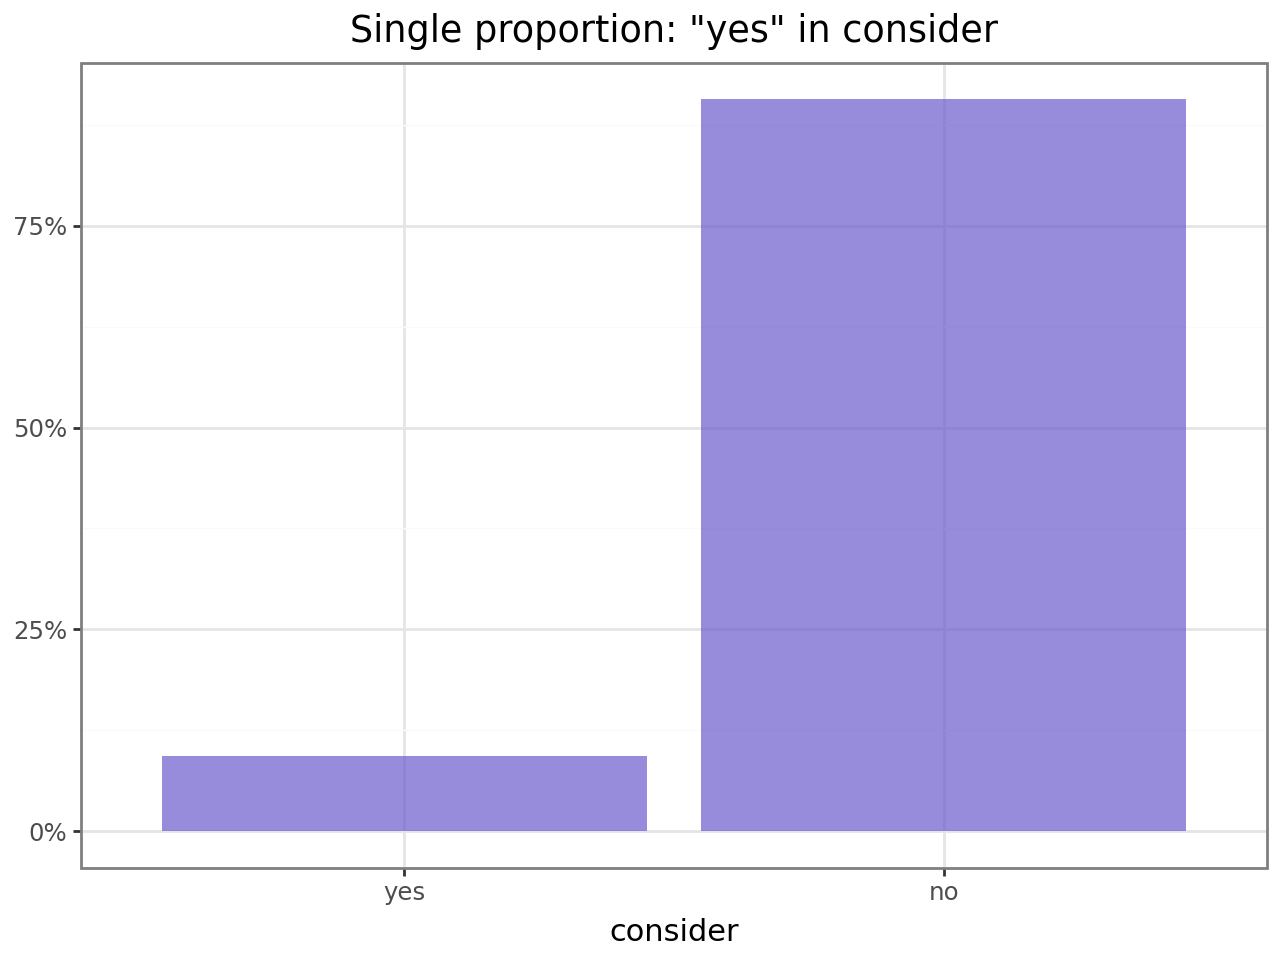

In [6]:
sp.plot()

# Testing

There are three approaches we can use to evaluate the null hypothesis. We will choose a significance level of 0.05.<sup>1</sup> Of course, each approach will lead to the same conclusion.

### p.value

Because the p.value is **larger** than the conventional significance level (0.249 > 0.05) we **cannot** reject the null hypothesis and **do not suggest** that management commit resources to increase brand awareness.

We can also obtain the p.value by using the probability calculator. Enter the number of successes in the data (93) as the lower bound (value) for a binomial-distribution with `n = 1000` and `p = 0.1`. The p.value is the probability of observing a number of successes as or more extreme than the 93 we got in our sample.

We see that `P(X <= 93) = 0.249` which is the same value we got from Single proportion test.

Probability Calculator
Distribution: Binomial
n           : 1000
p           : 0.1
Mean        : 100.0
St. dev     : 9.487
Lower bound : 93
Upper bound : 

P(X  = 93) = 0.033
P(X  < 93) = 0.216
P(X <= 93) = 0.249
P(X  > 93) = 0.751
P(X >= 93) = 0.784


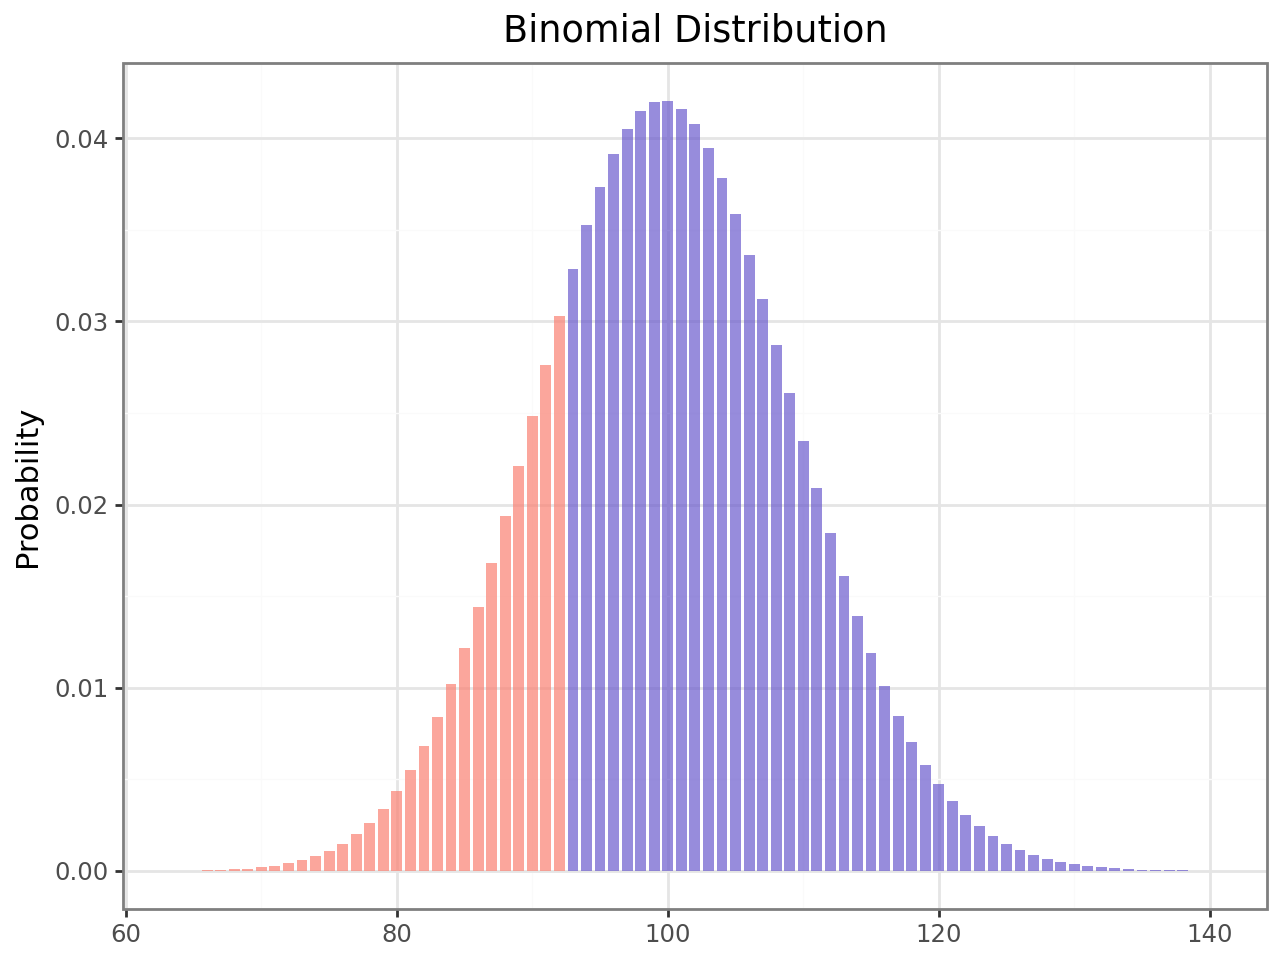

In [7]:
pc = rsm.basics.prob_calc("binom", n=1000, p=0.1, lb=93)
pc.summary()
pc.plot()

### Confidence interval

Because the `comparison value` **is** contained in the confidence interval (i.e., 0 < 0.1 < 0.11) we **cannot** reject the null hypothesis and **do not suggest** that management commit resources to increase brand awareness.

### Number of successes

We can obtain the critical value by using the probability calculator in the Basics menu. For a binomial-distribution with `n = 1000` and `p = 0.1` the critical value is 85. We have to enter 0.05 as the lower probability bound because the alternative hypothesis is `Less than`.

Probability Calculator
Distribution: Binomial
n           : 1000
p           : 0.1
Mean        : 100.0
St. dev     : 9.487
Lower bound : 0.05 (85.0)
Upper bound : 

P(X  = 85.0) = 0.012
P(X  < 85.0) = 0.049
P(X <= 85.0) = 0.061
P(X  > 85.0) = 0.939
P(X >= 85.0) = 0.951


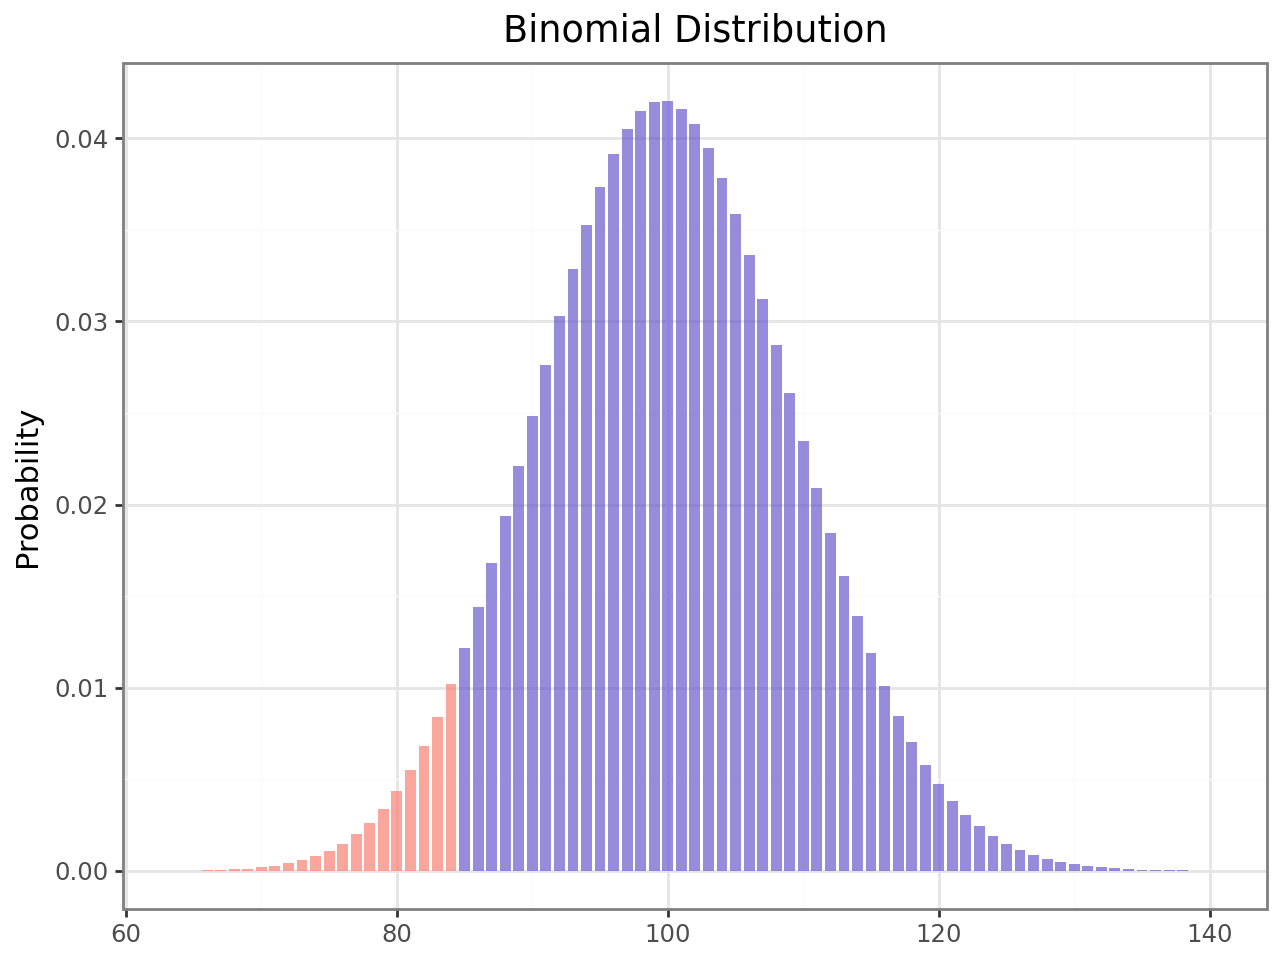

In [8]:
pc = rsm.basics.prob_calc("binom", n=1000, p=0.1, plb=0.05)
pc.summary()
pc.plot()

Because the number of successes (i.e., the number of “yes” responses) **is** larger than the critical value (93 vs 85) we **cannot** reject the null hypothesis and **do not suggest** that management commit resources to increase brand awareness.

# <i>Stats Speak</i>

This is a **single proportion** test of the null hypothesis that the true population **proportion** is equal to **0.1**. Using a significance level of 0.05, we **cannot reject** the null hypothesis, and **cannot conclude** that the true population **proportion** is **less** than **0.1**.

The p.value for this test is **0.249**. This is the probability of observing a sample **proportion** (or **number of successes**) that is as or more extreme than the sample value we estimated from the data if the null hypothesis is true. In this case, it is the probability of observing a sample **proportion** (**number of successes**) that is less than (or equal to) **0.093** (**93**) if the true population **proportion** is **0.1**.

The 95% confidence bound is **0.11**. If repeated samples were taken and the 95% confidence bound computed for each one, the true population proportion would be below that bound in 95% of the samples.

<sup>1</sup> The <b>significance level</b>, often denoted by α, is the highest probability you are willing to accept of rejecting the null hypothesis when it is actually true. A commonly used significance level is 0.05 (or 5%)

<sup>2</sup> 1−α is called the <b>confidence level</b>. A commonly used confidence level is 0.95 (or 95%)

# Video Tutorials

To review the same analysis in Radiant for R, copy-and-paste the full command below into the RStudio console (i.e., the bottom-left window) and press return to gain access to all materials used in the hypothesis testing module of the <a href="https://www.youtube.com/playlist?list=PLNhtaetb48EdKRIY7MewCyvb_1x7dV3xw" target="_blank">Radiant Tutorial Series</a>:

`usethis::use_course("https://www.dropbox.com/sh/0xvhyolgcvox685/AADSppNSIocrJS-BqZXhD1Kna?dl=1")`

<a href="https://youtu.be/tTYvBUCaR3w" target="_blank">Single Proportion Hypothesis Test</a>

* This video shows how to test a hypothesis about a single sample proportion versus a population proportion
* Topics List:
    - Setup a hypothesis test for a single proportion in Radiant
    - Use the p.value, confidence interval, or critical value to evaluate the hypothesis test

© Vincent Nijs (2026)